# Preliminary Data Exploration and Visualization

The key steps in the data analysis are as follows:
1. Analyze missing values in the data
2. Analyze variable types - float or objects
3. Analyze the distribution of target variable
4. Analyze the relationship between feature variables and target variable
5. Examine individual classes in the data


# Overview
- The dataset contains 1 target variable, NObeyesdad, and 16 feature variables
- There are a total of 2111 data points.
- 8 features are of type object, and 8 features are of type float
- There are no missing values in any variable

# Key observations
- People with a family history of obesity are much more likely to be overweight or obese, especially in the higher obesity classes. Those without a family history are mostly normal weight or underweight.
- People who usually walk instead of other means of transportation tend to have normal weight, and people who use automobiles tend to belong to higher weight categories.
- How often someone drinks alcohol does not seem to be related to weight class.
- People who "sometimes" eat between meals tend to belong to higher weight categories, and ones who report eating between meals "frequently", and "always" tend to have normal weight or insufficient weight. This might point to a bias in self-reported survey metrics where people who belong to higher weight categories, might tend to underestimate how often they eat between meals.
- There are only 44 people who report smoking out of 2111 in the survey, which is a much lower percentage that would be expected based on public health surveys.
- Height and weight have a correlation of 0.46. No other features have signification correlation with each other.

# Possible issues due to synthetic data generation:
- Classes Obesity_Type_II and Obesity_Type_III have very skewed gender distributions - There are only two female participants in Obesity_Type_II and only one male participant in Obesity_Type_III.
- All age ranges are not equally represented in each class. For Obesity_Type_III, Insufficient_Weight, and Normal_Weight in particular, the age range is quite narrow, compared to the other four classes, indicating possible bias in the data.
- For Obesity_Type_III, we also see two distinct groups with weight, which is different from all other classes and may indicate issues with synthetic data generation.
- Most of the synthetic data generated belong to Obesity_Level_II and Obesity_Level_III classes, which is the possible reason that there is a gender skew, two distinct weight groups and two distinct age groups in these classes. Therefore, any interpretation on these two classes may not be reliable.



## Import necessary libraries

In [137]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load the obesity dataset and extract global information
- The dataset contains 1 target variable, NObeyesdad, and 16 feature variables
- The dataset contains 8 variables of type object and 8 variables of type float
- There are no missing values

In [138]:
# Load the dataset
file_path = '../data/raw/ObesityDataSet_raw_and_data_sinthetic.csv'
obesity = pd.read_csv(file_path)

# Display the first few rows of the dataset
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [131]:
# Display some additional information about the dataset
obesity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [139]:
print("Number of features of type object ",sum(obesity.drop(['NObeyesdad'],axis =1, inplace=False).dtypes == "object"))
print("Number of features of type float ",sum(obesity.drop(['NObeyesdad'],axis =1, inplace=False).dtypes == "float"))

Number of features of type object  8
Number of features of type float  8


## Analyze the target variable
- There are 7 different classes in the target variable
- The number of data points across different classes ranges from 271 to 351.
- There are a lot more overweight and obesity data points than normal and underweight data points.

In [140]:
# Analyze the distribution of the target variable
print(f"Number of unique classes in the target variable : {(obesity['NObeyesdad'].nunique())}")
obesity.NObeyesdad.value_counts()


Number of unique classes in the target variable : 7


NObeyesdad
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

### Plot the number of observations in each weight class

In [141]:
# Set seaborn properties
sns.set_theme(style="white")
sns.set_context("paper", font_scale=1)
# plt.rcParams.update({
#     "figure.dpi": 300,              # High-resolution output
#     "axes.spines.top": False,
#     "axes.spines.right": False,
#     "axes.labelsize": 13,
#     "axes.titlesize": 16,
#     "axes.titleweight": "bold",
#     #"font.family": "serif",
#     "savefig.bbox": "tight"
# })

In [142]:
# Change the target name from "NObeyesdad" to "target"
obesity.rename(columns={"NObeyesdad": "weight_class"}, inplace=True)

# Count occurrences
feature = "weight_class"
counts = obesity[feature].value_counts().sort_index()

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/830043256.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


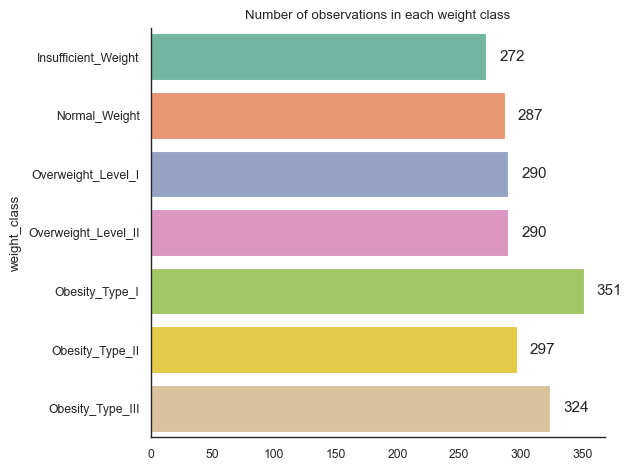

In [144]:
# Create horizontal bar plot
fig,ax = plt.subplots()

# Define custom order for categories
custom_order = [
    "Insufficient_Weight", "Normal_Weight", "Overweight_Level_I",
    "Overweight_Level_II", "Obesity_Type_I", "Obesity_Type_II", "Obesity_Type_III"
]

# Plot horizontal bars
ordered_counts = counts.reindex(custom_order)

sns.barplot(
    y=counts.index,
    x=counts.values,
    #hue=counts.index,
    #color = "gray",
    palette="Set2",
    order=custom_order,
    legend=False,
    #edgecolor="black",
    ax=ax
)
ax.set_title("Number of observations in each weight class")

# Add value labels to bars (with spacing)
offset = ordered_counts.max() * 0.03  # move labels slightly to the right
for i, val in enumerate(ordered_counts.values):
    ax.text(val + offset, i, f"{val}", va="center", fontsize=11)

# Finalize and save the plot
sns.despine()
plt.tight_layout()
plt.savefig(f"../images/eda/eda_{feature}_distribution_horizontal_bar.png", dpi=300, bbox_inches="tight")
plt.show()


### Understanding what each weight class means
- The paper reports that each weight class was generated based on BMI cutoffs. Let's check that assumption
- Plotting the categories with BMI does not show strict boundaries with weight class, likely because of synthetic data generation from original survey data.

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/3739878239.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y = "bmi", x = "weight_class", data = obesity, palette = "Set2")
/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/3739878239.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Insufficient_Weight'),
 Text(1, 0, 'Normal_Weight'),
 Text(2, 0, 'Overweight_Level_I'),
 Text(3, 0, 'Overweight_Level_II'),
 Text(4, 0, 'Obesity_Type_I'),
 Text(5, 0, 'Obesity_Type_II'),
 Text(6, 0, 'Obesity_Type_III')]

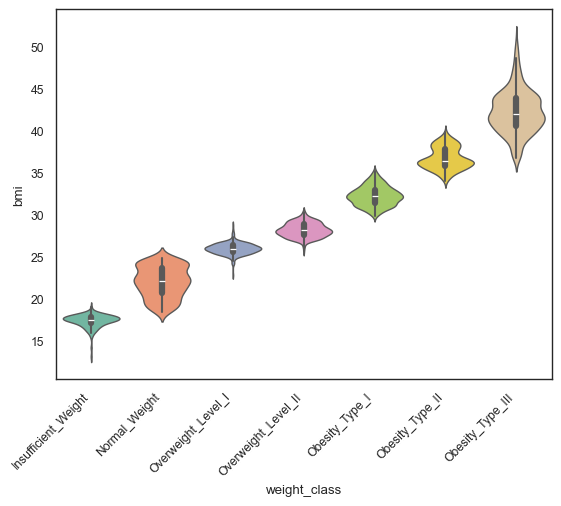

In [145]:
# make a custom order for the classes
obesity['weight_class'] = pd.Categorical(obesity['weight_class'], categories=custom_order, ordered=True)


obesity['bmi'] = obesity['Weight']/(obesity['Height']**2)
obesity['bmi']
# for weight_category in obesity['weight_class'].unique():
#     print(weight_category)
fig, ax = plt.subplots()
#sns.stripplot(y = "bmi", x = "weight_class", data = obesity, linewidth=1, facecolors = 'none', edgecolor = 'blue', alpha = 0.5 )
sns.violinplot(y = "bmi", x = "weight_class", data = obesity, palette = "Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')



## Distribution of age and gender in each weight class
- We see that the age distribution of participants in different weight classes is quite different, especially in Obesity_Type_III, where there are no participants older than 30 years. This can indicate that data are biased and not representative of the whole population for this class.
- We also see that gender distribution of participants is skewed in Obesity_Typ_eII and Obsesity_Type_III categories are very skewed. There are only two female participants in Obesity_Type_II and only one male participant in Obesity_Type_III.

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/1810518957.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = "weight_class", y = "Age", data = obesity, palette = "Set2")
/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/1810518957.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


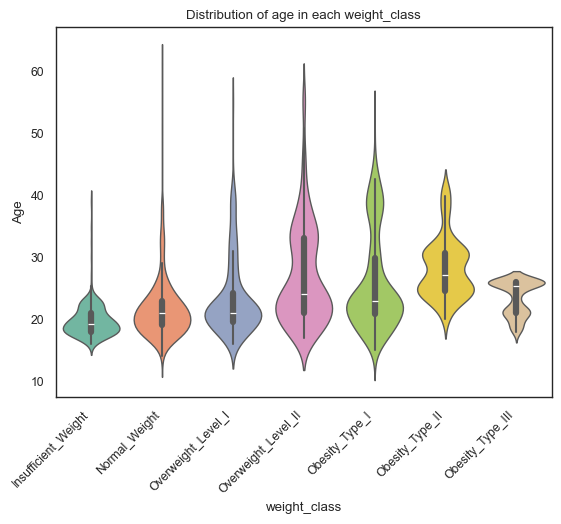

In [146]:
# Visualize Age distribution by Target using violin plot
#plt.figure(figsize=(8, 5))
#plt.figure()
fig, ax = plt.subplots()

# sns.stripplot(
#     x="weight_class",
#     y="Age",
#     data=obesity,
#     #palette="Set2",
#     linewidth=1, facecolors = 'none', edgecolor = 'blue', alpha = 0.5 
# )
sns.violinplot(x = "weight_class", y = "Age", data = obesity, palette = "Set2")

# Customize plot
ax.set_title("Distribution of age in each weight_class")
#plt.xlabel("Age", fontsize=12)
#ax.set_xlim(0, 70)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


# Finalize and save the plot
#sns.despine()
#plt.tight_layout()
#plt.savefig(f"../images/eda_dstribution_of_age_in_each_target.png", dpi=300, bbox_inches="tight")
plt.show()

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/4035382261.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contingency_table = obesity.groupby("weight_class")[["Age"]].agg([np.min, np.max])
/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/4035382261.py:2: FutureWarning: The provided callable <function min at 0x104eccc20> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  contingency_table = obesity.groupby("weight_class")[["Age"]].agg([np.min, np.max])
/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/4035382261.py:2: FutureWarning: The provided callable <function max at 0x104eccae0> is currently using SeriesGroupBy.max. In a f

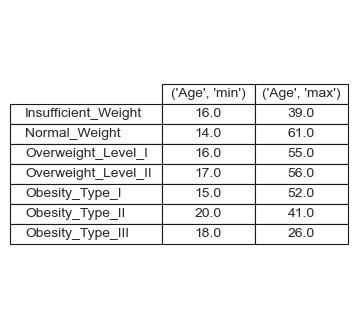

In [147]:
import numpy as np
contingency_table = obesity.groupby("weight_class")[["Age"]].agg([np.min, np.max])

# 2. Render the table using Matplotlib
fig, ax = plt.subplots(figsize=(2, 4)) # Adjust figure size as needed
ax.axis('off') # Hide axes for a cleaner table appearance
table = ax.table(cellText=contingency_table.values,
                 colLabels=contingency_table.columns,
                 rowLabels=contingency_table.index,
                 cellLoc='center', loc='center')

# Optional: Adjust table properties for better visualization
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2) # Scale the table for better readability

#plt.title('Contingency Table', fontsize=14)

# 3. Save the figure as an image
#plt.savefig('../images/eda_age_range_weight_class_contingency_table.png', bbox_inches='tight', dpi=300) # Save as PNG with high resolution
plt.show()
plt.close(fig) # Close the figure to free up memory

In [148]:
# Create a contingency table
contingency_table = pd.crosstab(obesity['weight_class'], obesity['Gender'])
print("Contingency Table (Counts):\n")
print(contingency_table)

# 2. Render the table using Matplotlib
fig, ax = plt.subplots(figsize=(2, 4)) # Adjust figure size as needed
ax.axis('off') # Hide axes for a cleaner table appearance
table = ax.table(cellText=contingency_table.values,
                 colLabels=contingency_table.columns,
                 rowLabels=contingency_table.index,
                 cellLoc='center', loc='center')

# Optional: Adjust table properties for better visualization
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2) # Scale the table for better readability

#plt.title('Contingency Table', fontsize=14)

# 3. Save the figure as an image
plt.savefig('../images/eda/eda_gender_weight_class_contingency_table.png', bbox_inches='tight', dpi=300) # Save as PNG with high resolution
plt.close(fig) # Close the figure to free up memory

Contingency Table (Counts):

Gender               Female  Male
weight_class                     
Insufficient_Weight     173    99
Normal_Weight           141   146
Overweight_Level_I      145   145
Overweight_Level_II     103   187
Obesity_Type_I          156   195
Obesity_Type_II           2   295
Obesity_Type_III        323     1


## Distribution of weight in each weight class

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/4149762368.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y = "Weight", x = "weight_class", data = obesity, palette = "Set2")
/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/4149762368.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


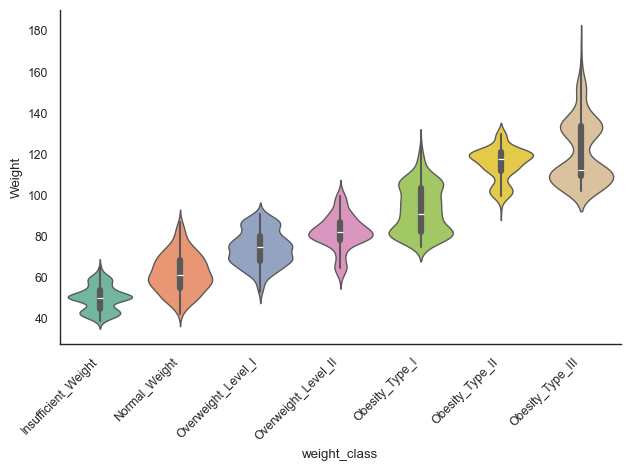

In [149]:
# Plot Weight distribution by Target using violin plot


fig, ax = plt.subplots()
#sns.stripplot(y = "bmi", x = "weight_class", data = obesity, linewidth=1, facecolors = 'none', edgecolor = 'blue', alpha = 0.5 )
sns.violinplot(y = "Weight", x = "weight_class", data = obesity, palette = "Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

# Finalize and save the plot
sns.despine()
plt.tight_layout()
#plt.savefig(f"../images/eda_weight_distribution_by_weight_class.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: The plot clearly visualizes a positive relationship between weight and obesity level. Higher categories (from Overweight Level I to Obesity Type III) show both higher average weights and broader weight distributions, generally starting from around 100 kg. Individuals classified as obese typically have higher weights compared to those in the normal or overweight categories.

## Distribution of family_history_wtih_overweight in each weight class
- People with a family history of obesity are much more likely to be overweight or obese, especially in the higher obesity classes.
Those without a family history are mostly normal weight or underweight.

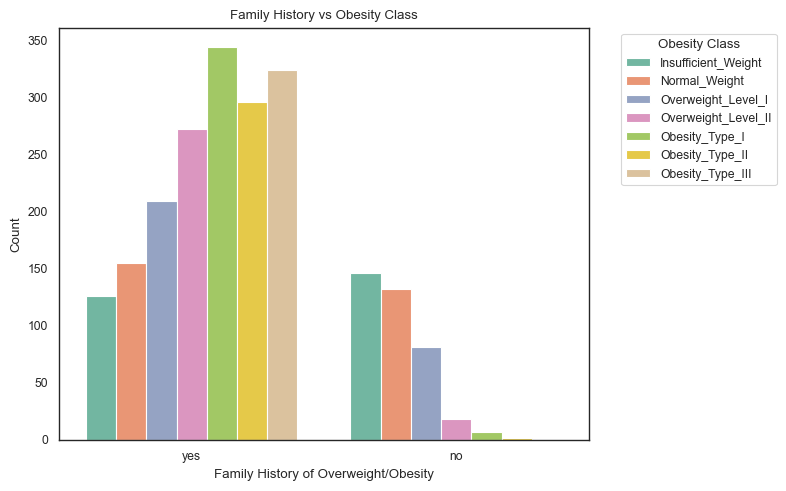

In [150]:
# Family History vs Obesity Class
plt.figure(figsize=(8,5))
sns.countplot(
    data=obesity,
    x='family_history_with_overweight',  # replace with your actual column name for family history
    hue='weight_class',
    palette='Set2'
)
plt.title('Family History vs Obesity Class')
plt.xlabel('Family History of Overweight/Obesity')
plt.ylabel('Count')
plt.legend(title='Obesity Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#plt.savefig("../images/eda_family_history_obesity_publication.png", dpi=300, bbox_inches="tight")
plt.show()

## Analyze relationship between SMOKE and target class
- Out of 2111 participants, only 44 smoke

In [151]:
# Analyze the distribution of the SMOKE feature
print(obesity.SMOKE.value_counts())
obesity.groupby(['weight_class', 'SMOKE']).size()

SMOKE
no     2067
yes      44
Name: count, dtype: int64


/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/812462219.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obesity.groupby(['weight_class', 'SMOKE']).size()


weight_class         SMOKE
Insufficient_Weight  no       271
                     yes        1
Normal_Weight        no       274
                     yes       13
Overweight_Level_I   no       287
                     yes        3
Overweight_Level_II  no       285
                     yes        5
Obesity_Type_I       no       345
                     yes        6
Obesity_Type_II      no       282
                     yes       15
Obesity_Type_III     no       323
                     yes        1
dtype: int64

## Analyze relationships between all categorical variables and weight_class
- People with a family history of obesity are much more likely to be overweight or obese, especially in the higher obesity classes.
Those without a family history are mostly normal weight or underweight.
- People who usually walk instead of other means of transportation tend to have normal weight, and people who use automobiles tend to belong to higher weight categories.
- How often someone drinks alcohol does not seem to be related to weight class.
- People who "sometimes" eat between meals tend to belong to higher weight categories, and ones who report eating between meals "frequently", and "always" tend to have normal weight or insufficient weight. This might point to a bias in self-reported survey metrics where people who belong to higher weight categories, might tend to underestimate how often they eat between meals.
- There are only 44 people who report smoking out of 2111 in the survey, which is a much lower percentage that would be expected based on public health surveys, indicating biases in self-reporting.

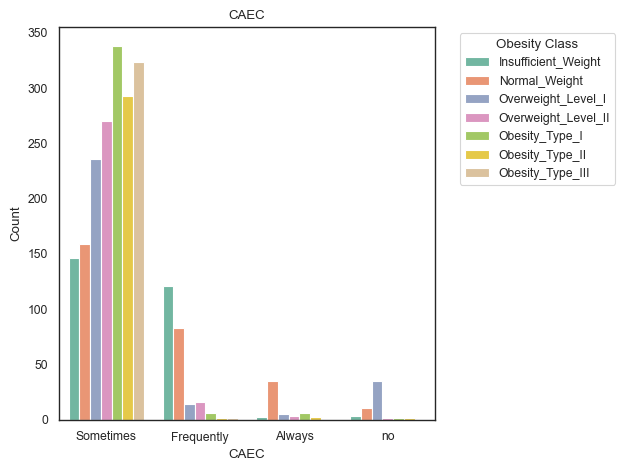

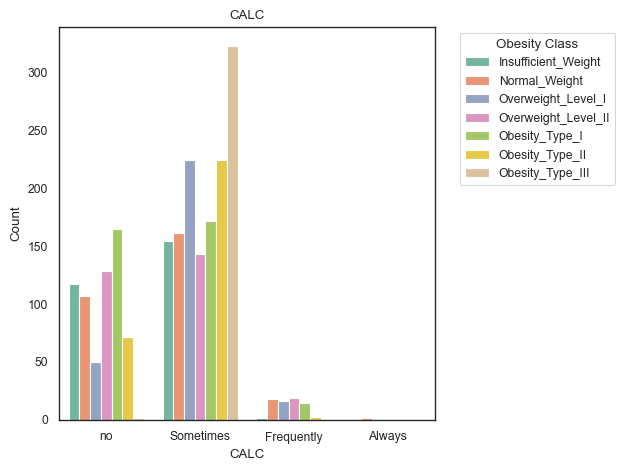

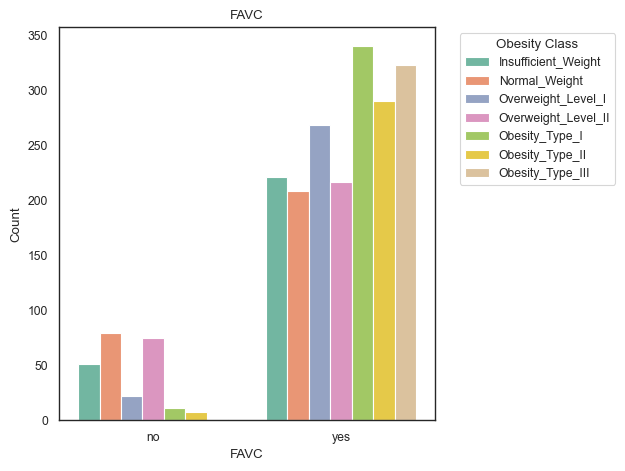

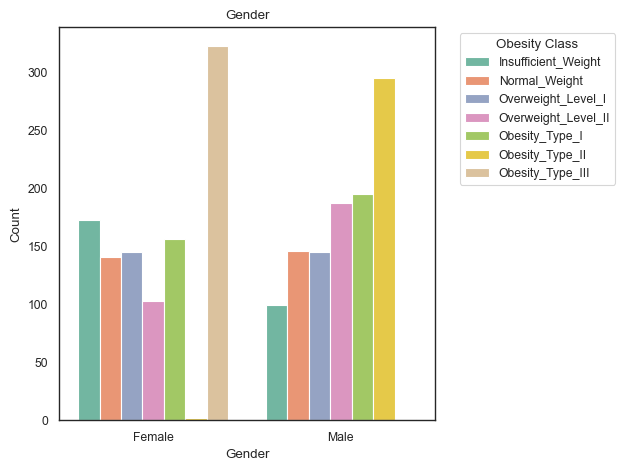

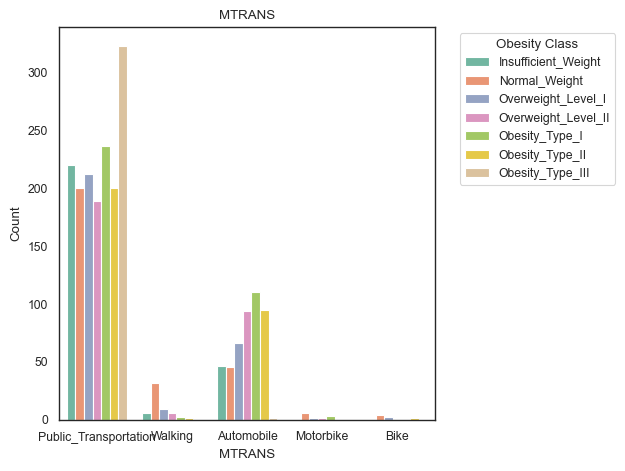

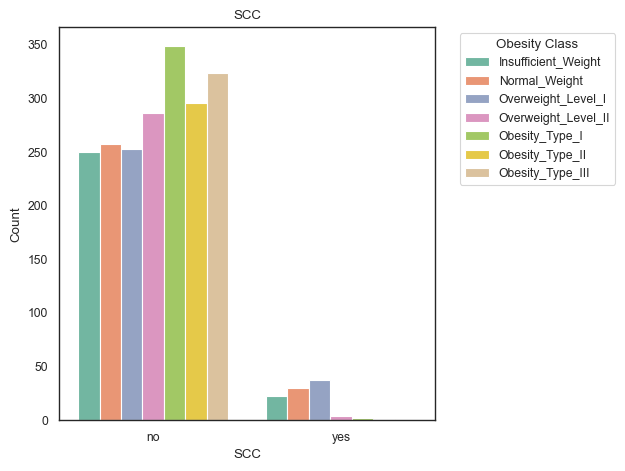

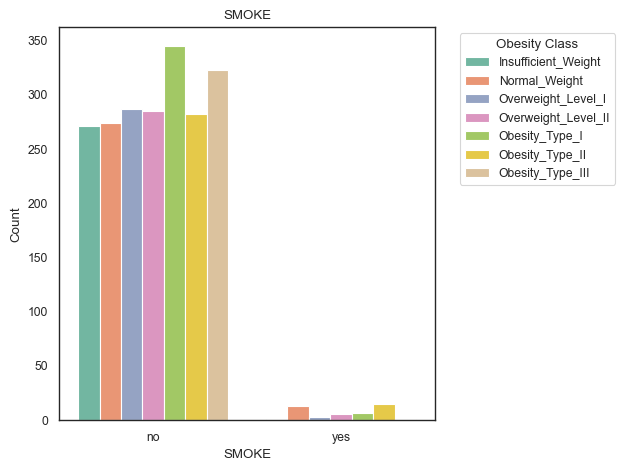

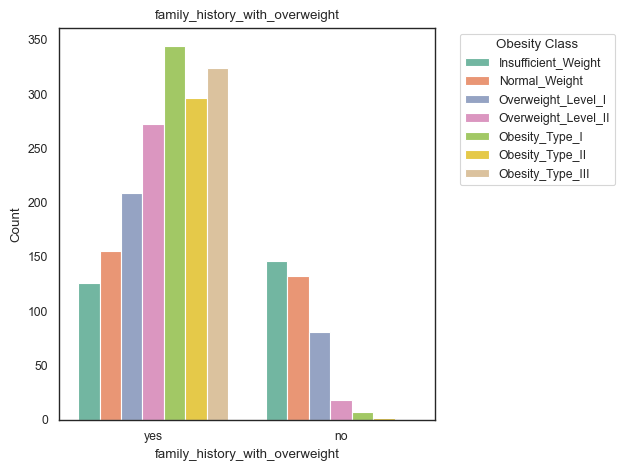

In [152]:
def plot_categorical_feature(column):
    plt.figure()
    sns.countplot(
        data=obesity,
        x=column,  # replace with your actual column name for family history
        hue='weight_class',
        palette='Set2'
    )
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.legend(title='Obesity Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()

    plt.savefig(f"../images/eda/eda_{column}_counts_with_weight_class.png", dpi=300, bbox_inches="tight")
    plt.show()



for column in obesity.columns.difference(['weight_class']):
    if obesity[column].dtypes == "object":
        #print(f"\n{column}")
        #print(obesity[column].value_counts())
        #print(obesity.groupby(['weight_class', column]).size())
        plot_categorical_feature(column)





/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


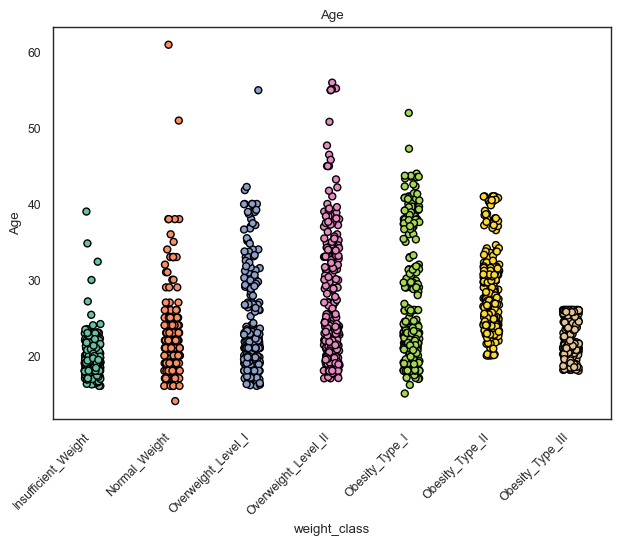

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


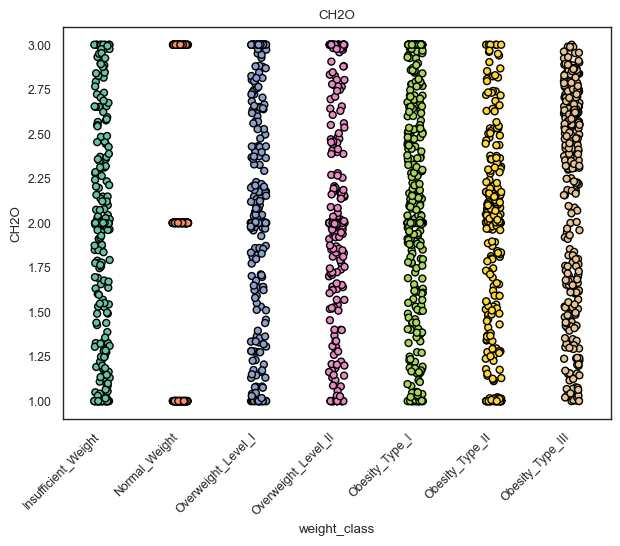

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


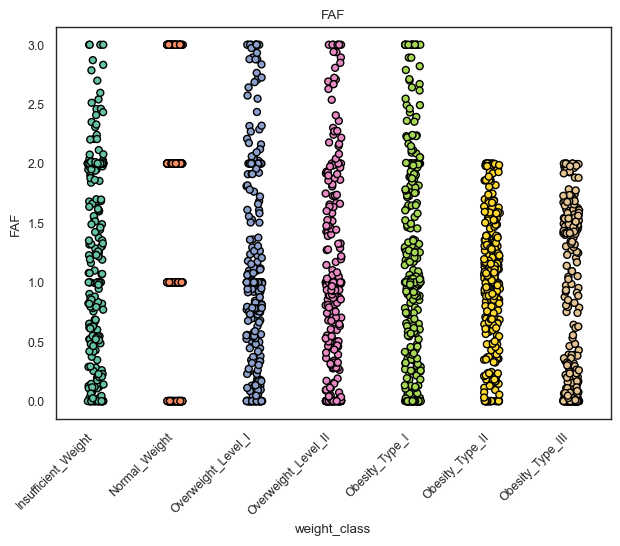

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


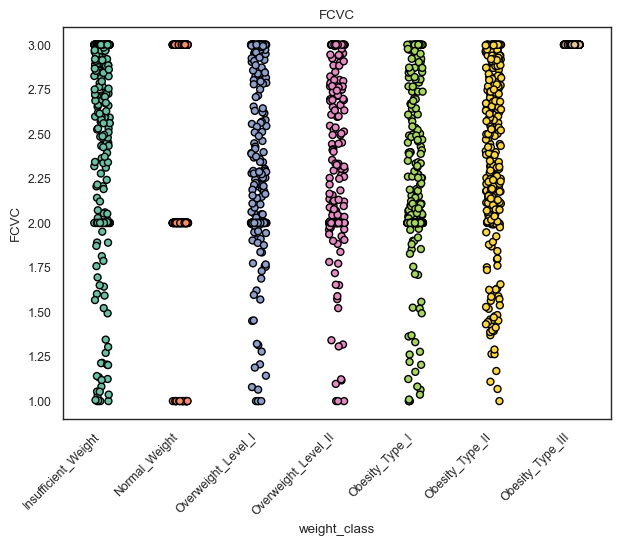

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


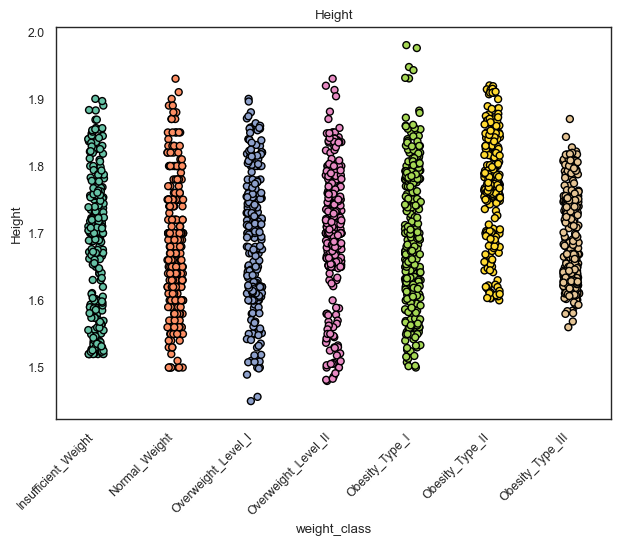

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


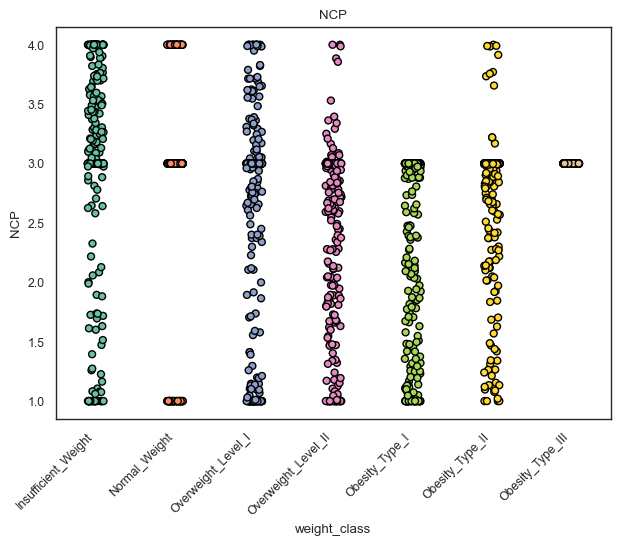

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


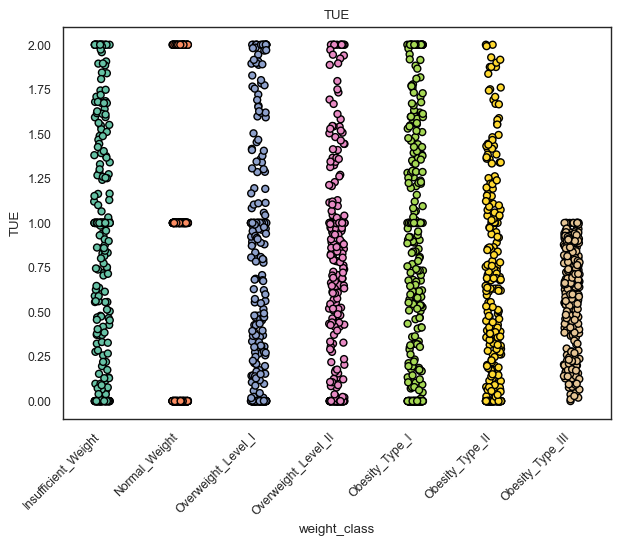

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


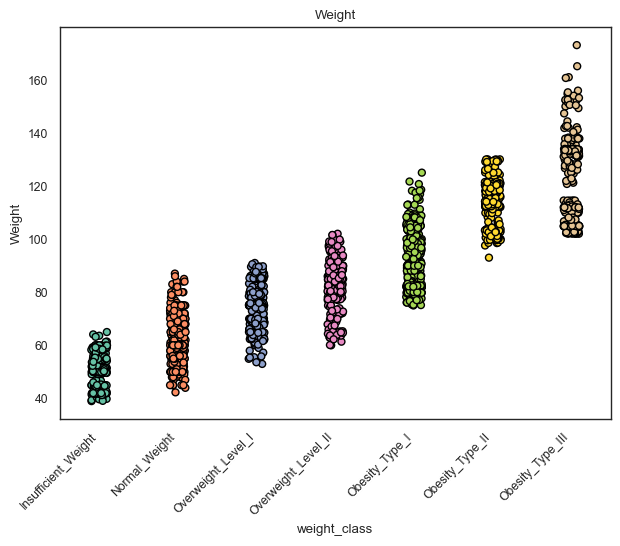

/var/folders/s7/1h5812v56198slm5x05gnjl00000gn/T/ipykernel_26774/2828436769.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


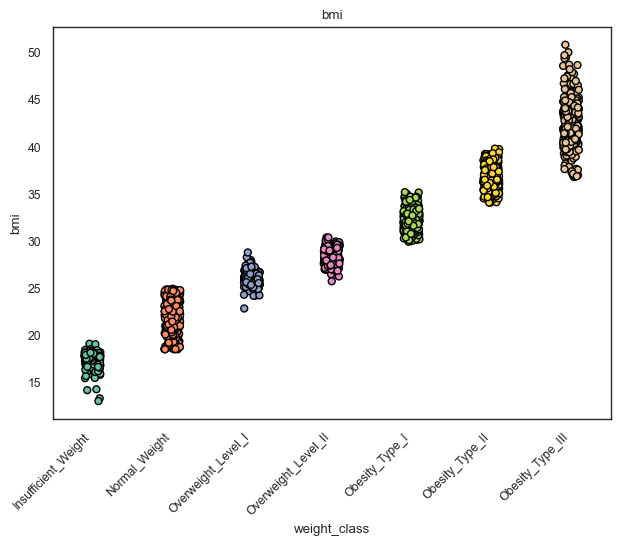

In [153]:
def plot_numerical_feature(column):
    plt.figure()
    ax = sns.stripplot(
        data=obesity,
        y=column,  # replace with your actual column name for family history
        x = "weight_class",
        hue='weight_class',
        palette='Set2',
        facecolor='none',
        edgecolor="black",
        linewidth=1
    )
    plt.title(column)
    plt.xlabel("weight_class")
    plt.ylabel(column)
    #plt.legend(title='Obesity Class', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.savefig(f"../images/eda/eda_{column}_dsitribution_with_weight_class.png", dpi=300, bbox_inches="tight")
    plt.show()



for column in obesity.columns.difference(['weight_class']):
    if obesity[column].dtypes == "float":
        #print(f"\n{column}")
        #print(obesity[column].value_counts())
        #print(obesity.groupby(['weight_class', column]).size())
        plot_numerical_feature(column)




## Create Heatmap for Counting Correlation amongs the Numerical Features

In [154]:
# Select numerical columns only
numerical_df = obesity.drop(columns="bmi", inplace = False).select_dtypes(include=['int64', 'float64'])

In [155]:
# Calculate the correlations
corr = numerical_df.corr()

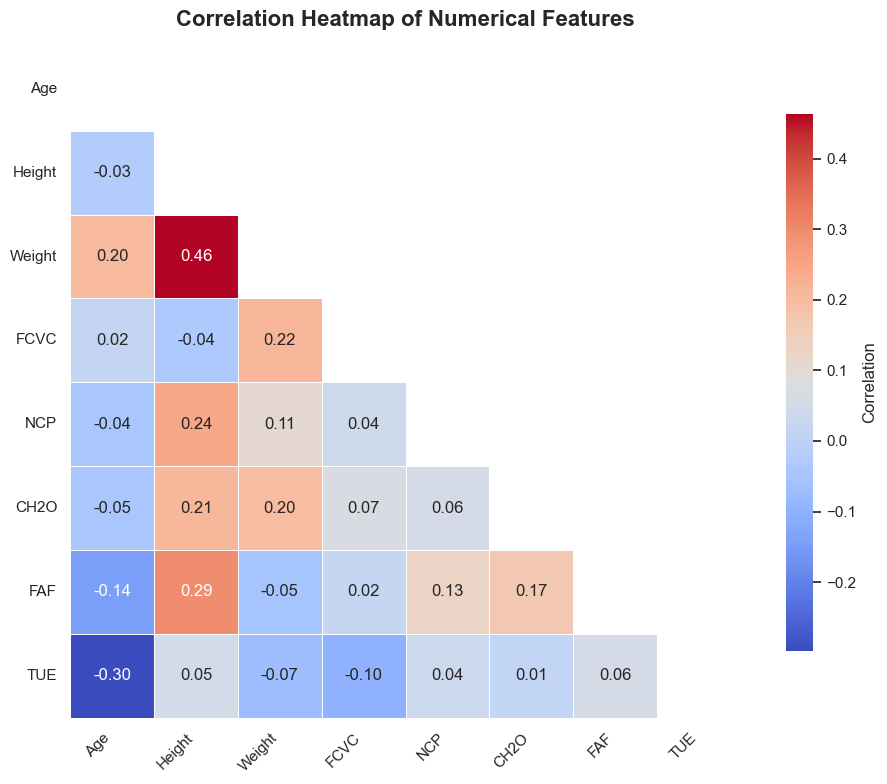

In [156]:
# Plot the heatmap
import numpy as np

plt.figure(figsize=(10, 8))
sns.set_theme(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))  # mask upper triangle

# Create the heatmap
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",          # or 'RdBu_r', 'vlag', 'YlGnBu'
    annot=True,               # show correlation values
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    square=True
)

# Customize plot
ax.set_title("Correlation Heatmap of Numerical Features", fontsize=16, fontweight="bold", pad=15)
plt.xticks(fontsize=11, rotation=45, ha="right")
plt.yticks(fontsize=11, rotation=0)
plt.tight_layout()

# Save at high resolution
plt.savefig("../images/eda/eda_correlation_heatmap_publication.png", dpi=300, bbox_inches="tight")
plt.show()

Interpretation: there are some signs of multicolinearity. For example the correlation between Weight and Height is 0.46. Solution: use tree based model for classification since tree based model can handle multicolinearity in the dataset.